# Testing the `plot` module

**Authorship:**
Adam Klie, *07/12/2022*
***
**Description:**
Notebook for testing out the `plot` module.

In [1]:
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

import os
import torch
import numpy as np
import pandas as pd
import eugene as eu

ModuleNotFoundError: No module named 'torch'

# Load processed `random1000_10` dataset

In [2]:
# Loads a random dataset of 1000 sequences of length 66 with 10 potential targets
sdata = eu.dl.read_h5sd("../../eugene/datasets/random1000_10/random1000_10_processed.h5sd")
sdata

SeqData object with = 1000 seqs
seqs = (1000,)
names = (1000,)
rev_seqs = (1000,)
ohe_seqs = (1000, 66, 4)
ohe_rev_seqs = (1000, 66, 4)
seqs_annot: 'ACTIVITY_0', 'ACTIVITY_0_PREDICTIONS', 'ACTIVITY_1', 'ACTIVITY_1_PREDICTIONS', 'ACTIVITY_2', 'ACTIVITY_2_PREDICTIONS', 'ACTIVITY_3', 'ACTIVITY_3_PREDICTIONS', 'ACTIVITY_4', 'ACTIVITY_4_PREDICTIONS', 'ACTIVITY_5', 'ACTIVITY_5_PREDICTIONS', 'ACTIVITY_6', 'ACTIVITY_6_PREDICTIONS', 'ACTIVITY_7', 'ACTIVITY_7_PREDICTIONS', 'ACTIVITY_8', 'ACTIVITY_8_PREDICTIONS', 'ACTIVITY_9', 'ACTIVITY_9_PREDICTIONS', 'LABEL_0', 'LABEL_1', 'LABEL_2', 'LABEL_3', 'LABEL_4', 'LABEL_5', 'LABEL_6', 'LABEL_7', 'LABEL_8', 'LABEL_9', 'SEQ_LEN', 'TRAIN'
pos_annot: PyRanges object with 1436 features
seqsm: 'InputXGradient_imps_pca', 'InputXGradient_imps_umap'
uns: 'InputXGradient_imps', 'pfms'

# Raw data plotting functions (`_catplot.py`)

Text(0.5, 24.80000000000002, 'GATA Activity')

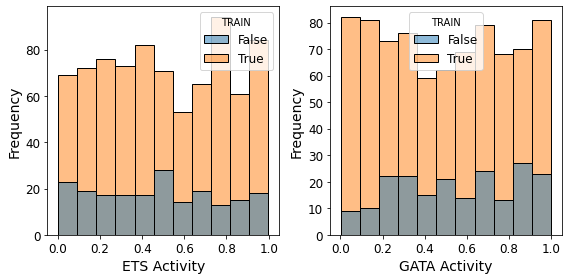

In [3]:
# Histograms
ax = eu.pl.histplot(sdata, keys=["ACTIVITY_0", "ACTIVITY_1"], orient="h", hue="TRAIN", return_axes=True)
ax[0].set_xlabel("ETS Activity")
ax[1].set_xlabel("GATA Activity")

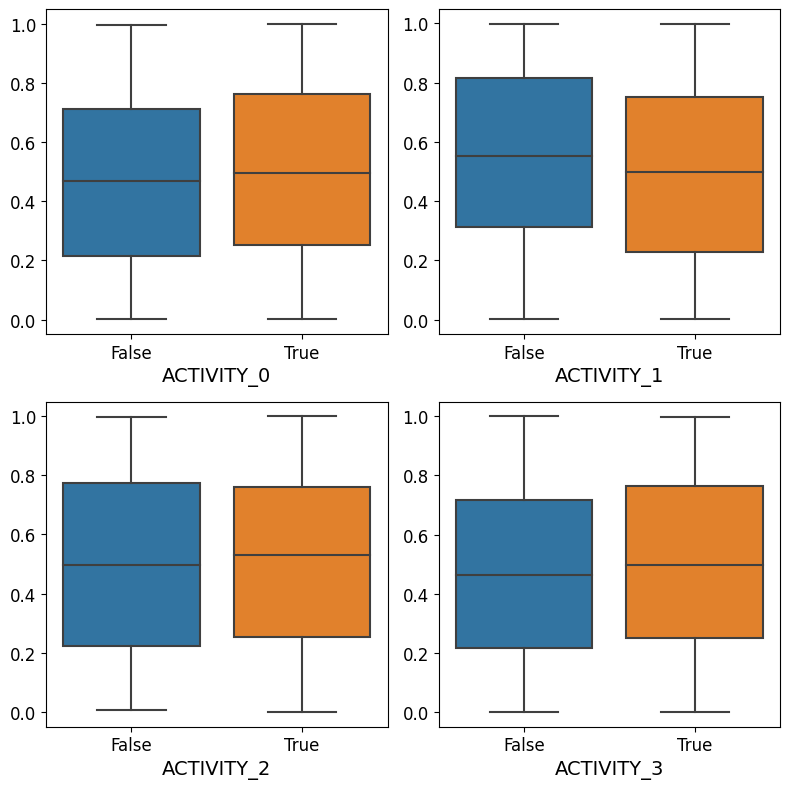

In [4]:
# Boxplots
eu.pl.boxplot(sdata, keys=['ACTIVITY_0', 'ACTIVITY_1', 'ACTIVITY_2', 'ACTIVITY_3'], groupby="TRAIN")

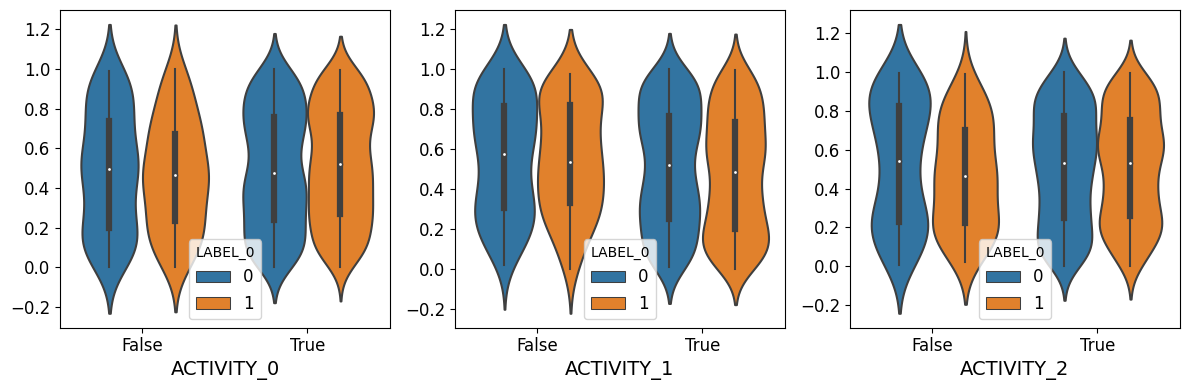

In [5]:
# Violin plots
eu.pl.violinplot(sdata, keys=['ACTIVITY_0', 'ACTIVITY_1', 'ACTIVITY_2'], groupby="TRAIN", hue="LABEL_0")

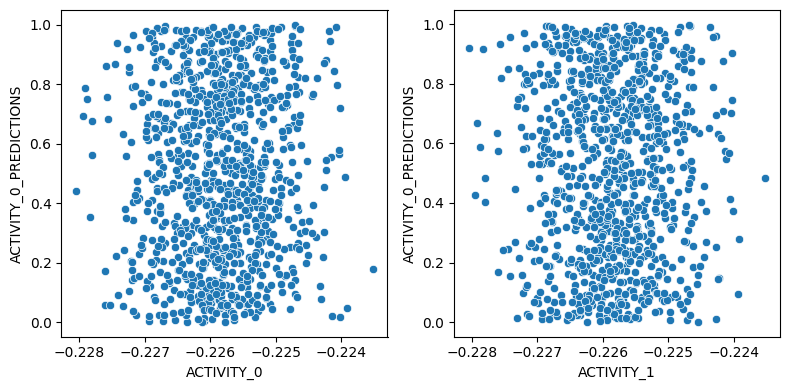

In [6]:
# Scatter plots
eu.pl.scatterplot(sdata, x=["ACTIVITY_0", "ACTIVITY_1"], y="ACTIVITY_0_PREDICTIONS")

# Training evaluation plotting functions (`_training.py`)

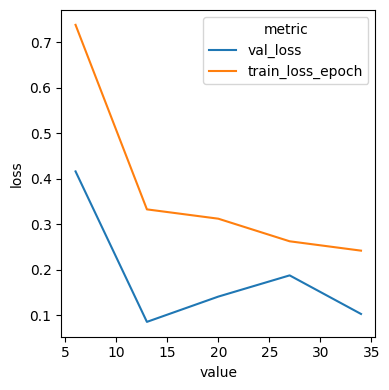

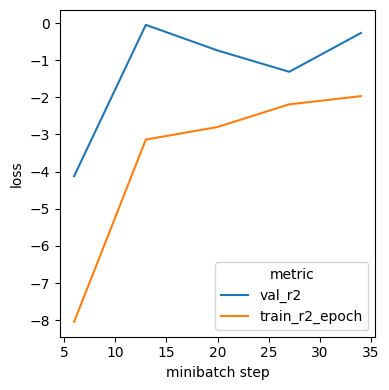

In [7]:
# Training curves
log_dir = "../_logs/default/version_0/"
eu.pl.training_summary(log_dir, metrics="r2")

# Regression evaluation plotting functions (`_regression.py`)

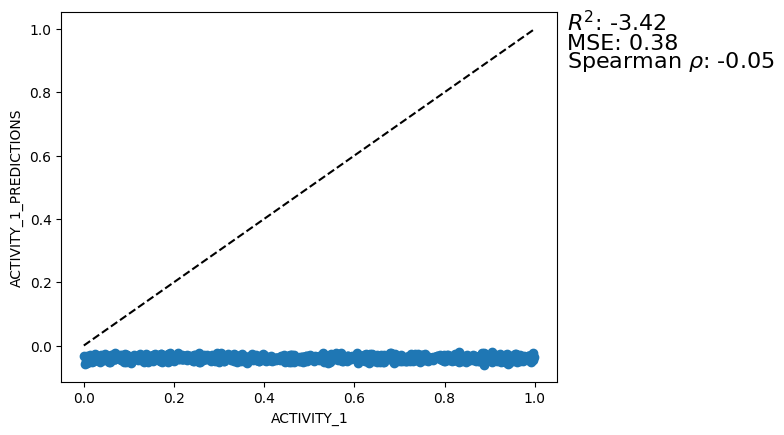

In [8]:
# Scatterplot of performance
eu.pl.performance_scatter(sdata, target="ACTIVITY_1", prediction="ACTIVITY_1_PREDICTIONS")

# Classification evaluation plotting functions (`_classification.py`)

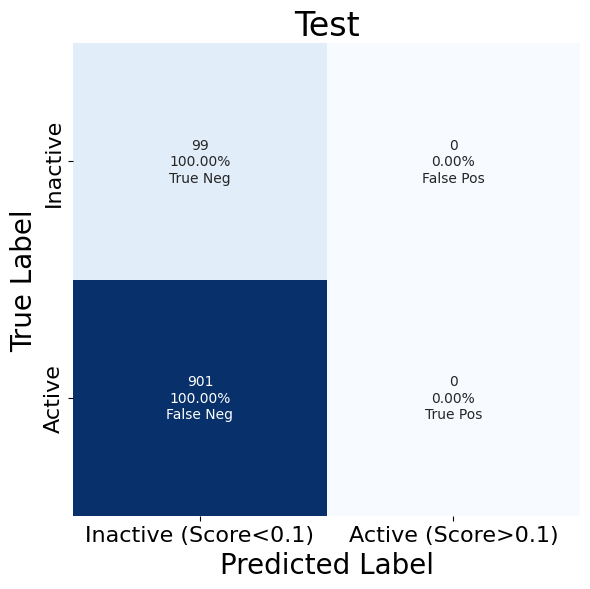

In [9]:
# Confusion matrix
eu.pl.confusion_mtx(sdata, target="ACTIVITY_0", prediction="ACTIVITY_0_PREDICTIONS", threshold=0.1, title="Test")

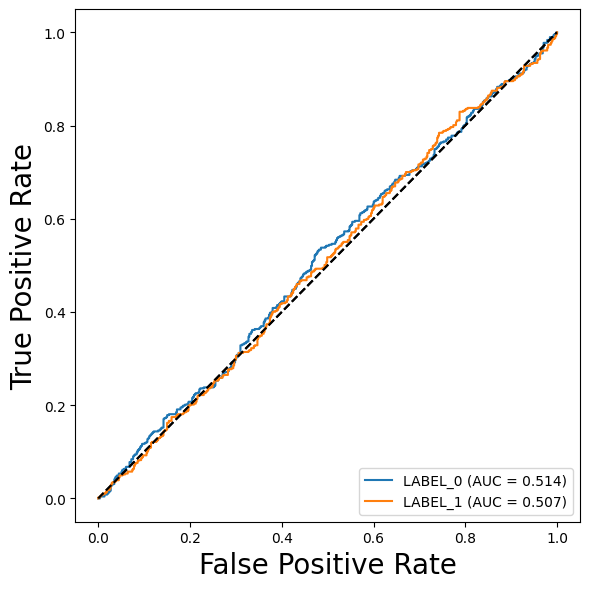

In [10]:
# Plot auroc curve
eu.pl.auroc(sdata, targets=["LABEL_0", "LABEL_0"], predictions=["ACTIVITY_0_PREDICTIONS", "ACTIVITY_1_PREDICTIONS"])

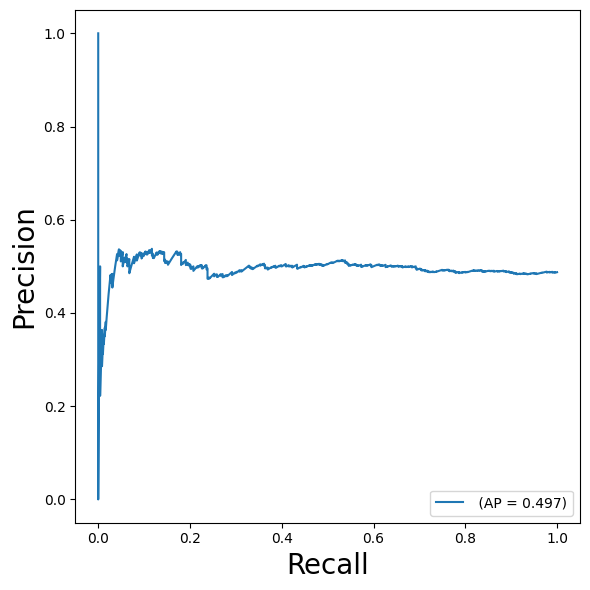

In [11]:
# Plot auprc curve
eu.pl.auprc(sdata, targets="LABEL_0", predictions="ACTIVITY_0_PREDICTIONS")

# Sequence plotting functions (`_seq.py`)

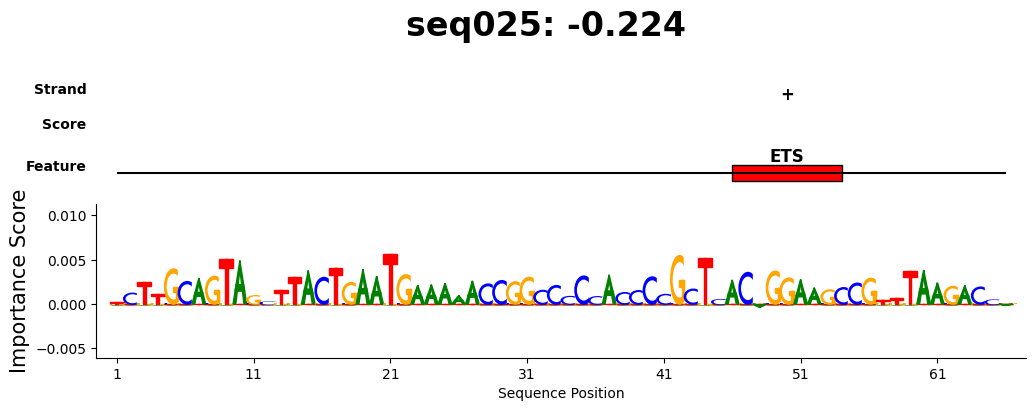

In [13]:
# Plot sequence logo based on feature importance
eu.pl.seq_track(sdata, seq_id=sdata.names[25], uns_key="InputXGradient_imps", pred_key="ACTIVITY_0_PREDICTIONS")

In [14]:
# Filter visualization
eu.pl.filter_viz(sdata, filter_id=0)

OSError: Could not find Ghostscript on path. There should be either a gs executable or a gswin32c.exe on your system's path

---

# Dimensionality reduction plotting functions (`_dim_reduce.py`)

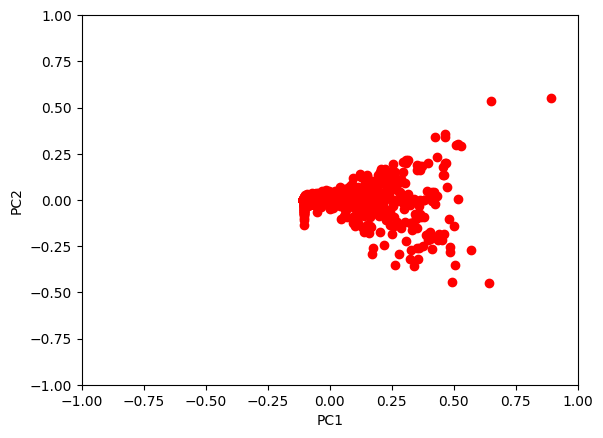

In [23]:
# PCA plotting
eu.pl.pca(sdata, seqsm_key="InputXGradient_imps_pca", color="r")

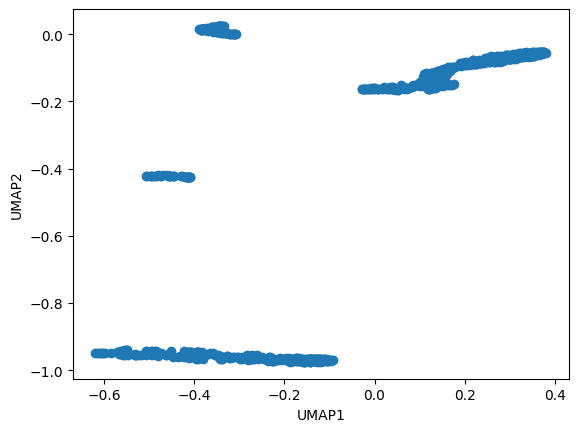

In [21]:
# UMAP plotting
eu.pl.umap(sdata, seqsm_key="InputXGradient_imps_umap")

# Load the best model

In [4]:
leaf_model_file = glob.glob(os.path.join(eu.settings.logging_dir, "Jores21CNN", f"test_leaf_trial_1", "checkpoints", "*"))[0]
leaf_model = eu.models.Jores21CNN.load_from_checkpoint(leaf_model_file)

## Feature attribution

In [5]:
saliency_methods = ["InputXGradient", "DeepLift", "GradientSHAP"]#, "NaiveISM"]
for method in saliency_methods:
    eu.interpret.feature_attribution(
        leaf_model,
        sdata_leaf,
        saliency_method=method
    )

No transforms given, assuming just need to tensorize).


Computing saliency on batches: 0it [00:00, ?it/s]

No transforms given, assuming just need to tensorize).


Computing saliency on batches: 0it [00:00, ?it/s]

/home/vscode/.local/lib/python3.7/site-packages/captum/attr/_core/deep_lift.py:339: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  after the attribution is finished"""


No transforms given, assuming just need to tensorize).


Computing saliency on batches: 0it [00:00, ?it/s]

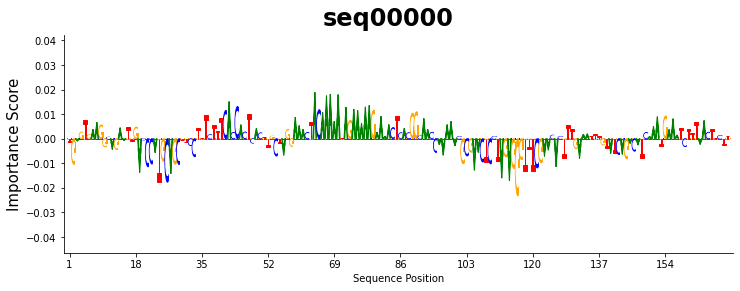

In [13]:
eu.pl.seq_track(
    sdata_leaf,
    seq_id="seq00000",
    uns_key="InputXGradient_imps"
)

Importance values: 0it [00:00, ?it/s]

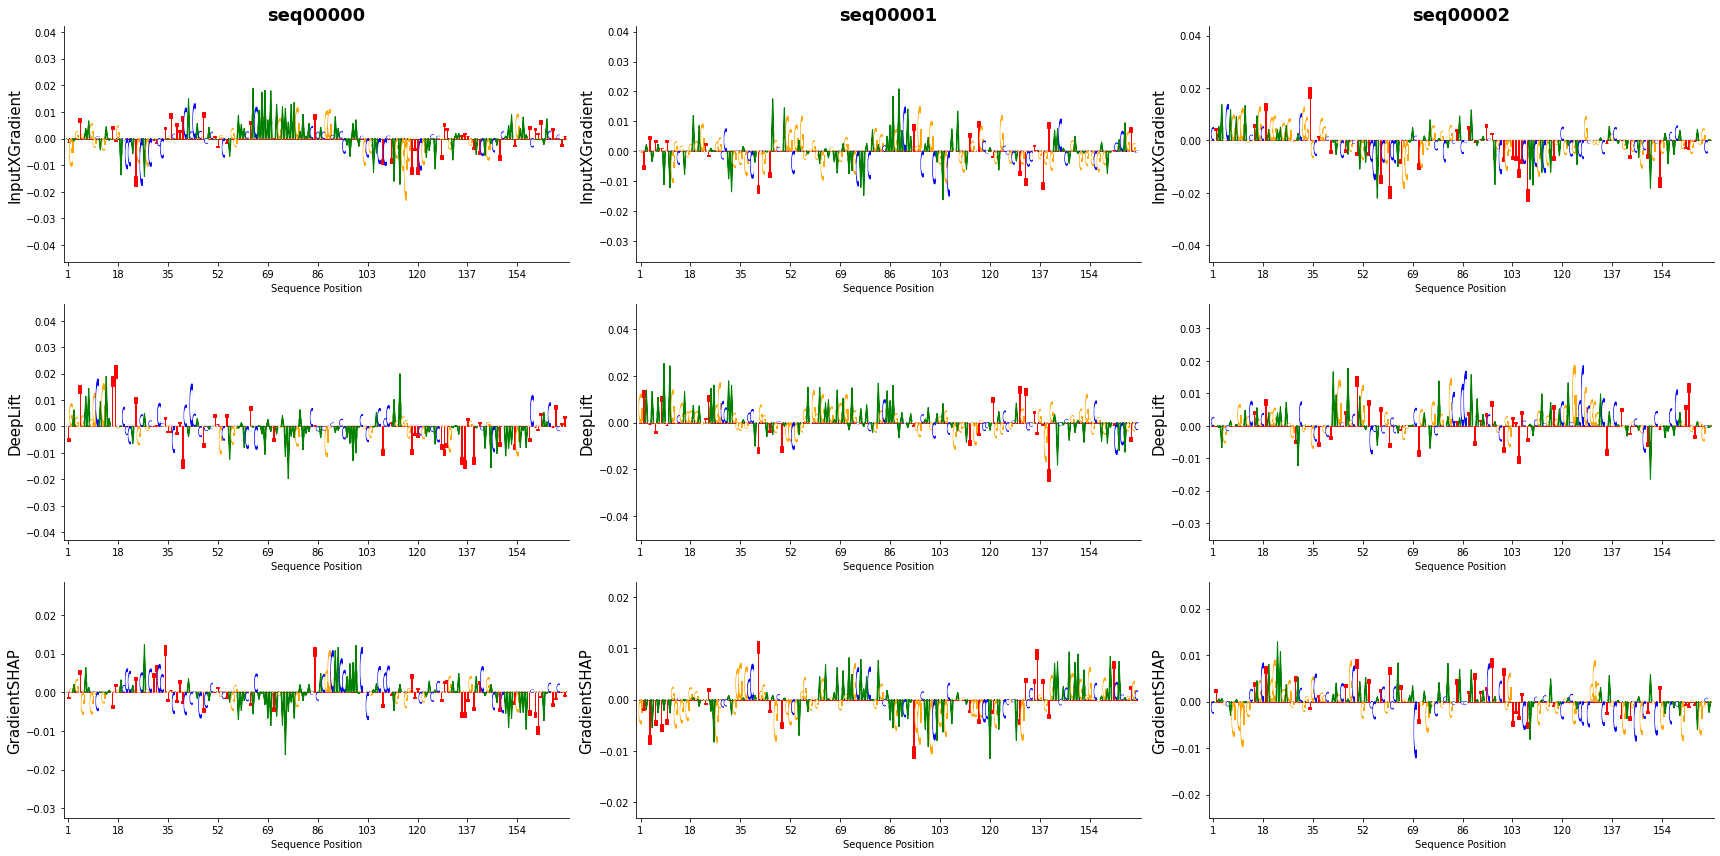

In [6]:
eu.pl.multiseq_track(
    sdata_leaf,
    seq_ids=sdata_leaf.names[:3],
    uns_keys = [method + "_imps" for method in saliency_methods],
    ylabels=saliency_methods
)

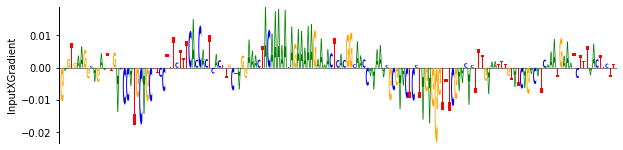

In [12]:
eu.pl.lm_seq_track(
    sdata_leaf,
    seq_id="seq00000",
    uns_key="InputXGradient_imps",
    ylabel="InputXGradient",
)

Importance values: 0it [00:00, ?it/s]

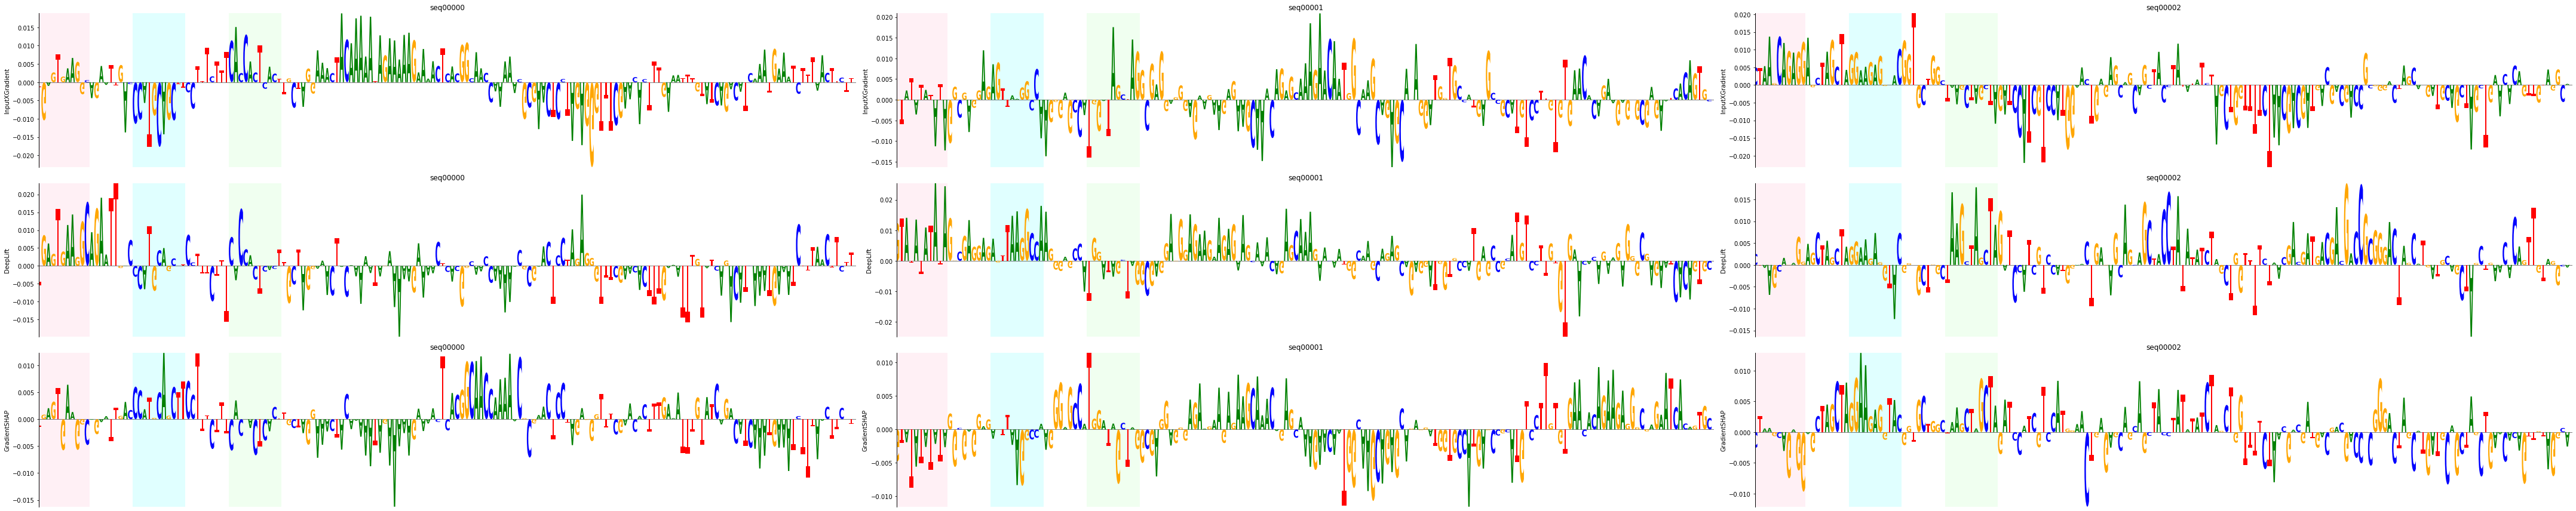

In [8]:
eu.pl.lm_multiseq_track(
    sdata_leaf,
    seq_ids=sdata_leaf.names[:3],
    uns_keys = [method + "_imps" for method in saliency_methods],
    ylabels=saliency_methods,
    highlights=[(0, 10), (20, 30), (40, 50)], 
    width=60, 
    height=12,
)

In [14]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

Importance values: 0it [00:00, ?it/s]

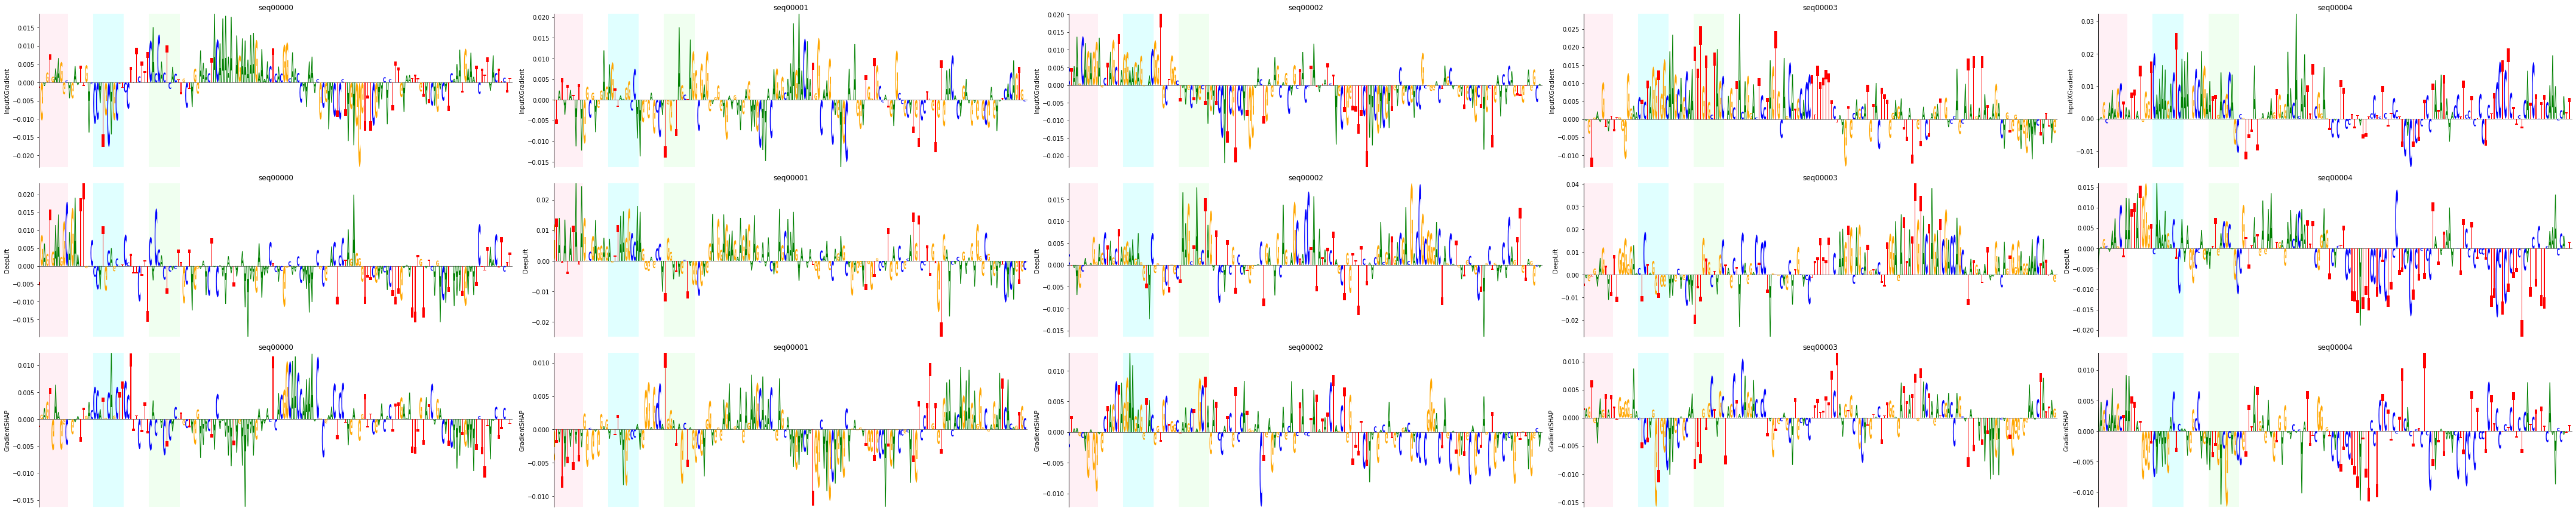

In [17]:
lm_multiseq_track(
    sdata_leaf, 
    seq_ids=sdata_leaf.names[:5],
    uns_keys = [method + "_imps" for method in saliency_methods],
    ylabels=saliency_methods,
    highlights=[(0, 10), (20, 30), (40, 50)], 
    width=60, 
    height=12,
    save=os.path.join(eu.settings.output_dir, "leaf_saliency_track.pdf")
)

# Filter viz

In [19]:
eu.interpret.generate_pfms(leaf_model, sdata_leaf)

cpu
No transforms given, assuming just need to tensorize).
cpu


Getting maximial activating seqlets: 0it [00:00, ?it/s]

Decoding DNA sequences:   0%|          | 0/100 [00:00<?, ?it/s]

Getting PFMs from filters:   0%|          | 0/128 [00:00<?, ?it/s]

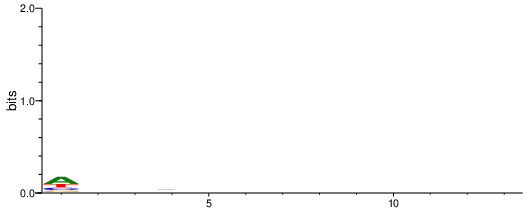

In [22]:
eu.pl.filter_viz(
    sdata_leaf,
    filter_id=1,
    uns_key="pfms"
)

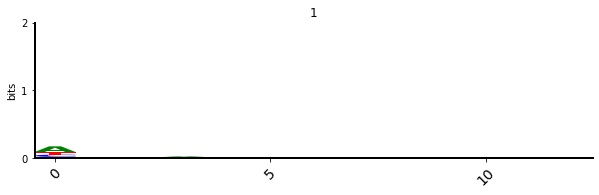

In [20]:
eu.pl.lm_filter_viz(
    sdata_leaf,
    filter_id=1,
    uns_key="pfms"
)

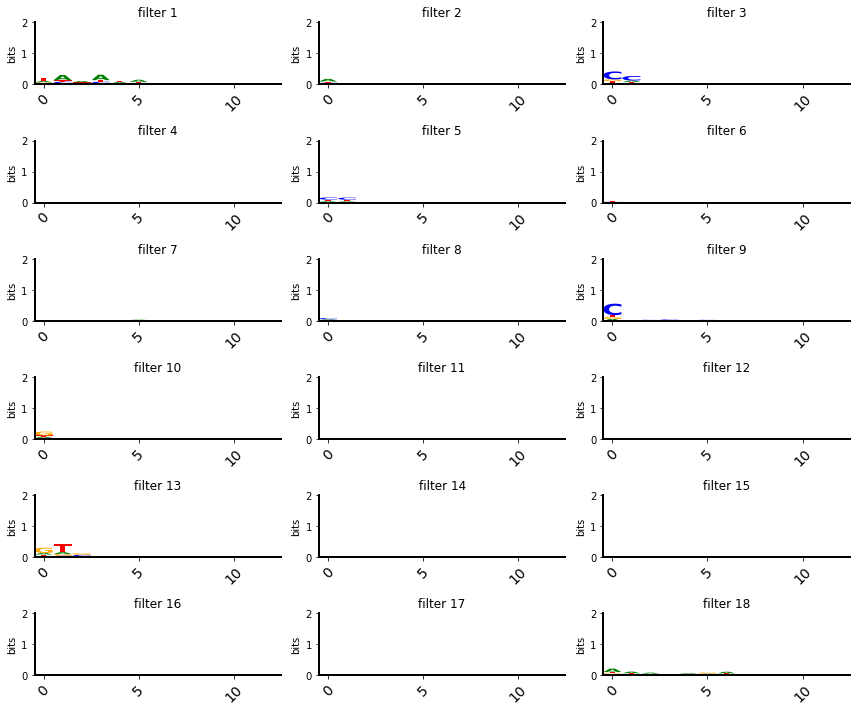

In [23]:
eu.pl.lm_multifilter_viz(
    sdata_leaf,
    filter_ids=list(sdata_leaf.uns["pfms"].keys()),
    num_rows=6,
    num_cols=3,
    titles=[f"filter {i}" for i in range(1, len(sdata_leaf.uns["pfms"])+1)],
)

# Scratch

In [ ]:
def _plot_histogram(sdata, keys: Union[str, Sequence[str]], title: str = None, xlab: str = None, ylab: str = "Frequency", **kwargs):
    keys = [keys] if isinstance(keys, str) else keys
    num_axes = len(keys)
    ax = _create_matplotlib_axes(num_axes, **kwargs)
    for i, key in enumerate(keys):
        curr_ax = ax[i] if len(keys) > 1 else ax
        row_index = int(np.ceil(i / 3))
        col_index = int(np.ceil(i / (row_index+1)))
        ps = sdata.seqs_annot[key].values.reshape(-1, 1)
        curr_ax.hist(ps, **kwargs)
        _label_plot(curr_ax, title, xlab=key if xlab is None else xlab, ylab=ylab)
    plt.show()
    return ax

def histogram(sdata, keys, rc_context=default_rc_context, **kwargs):
    with plt.rc_context(rc_context):
        _plot_histogram(sdata, keys, **kwargs)

In [ ]:
def _plot_curves(
    xs: Union[Sequence[Sequence[float]], Sequence[float]],
    ys: Union[Sequence[Sequence[float]], Sequence[float]],
    labels: Union[Sequence[str], str] = "",
    colors: Union[Sequence[str], str] = "bgrcmyk",
    **kwargs
):
    """
    Plots curves for multiple xs and ys.
    """
    if isinstance(xs, str):
        xs = [xs]
    if isinstance(ys, str):
        ys = [ys]
    if len(xs) != len(ys):
        raise ValueError("Number of xs and ys must be equal.")
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    if len(xs) == 1:
        _plot_curve(ax, xs[0], ys[0], **kwargs)
    else:
        for i, (target, prediction) in enumerate(zip(xs, ys)):
            _plot_curve(ax, xs[i], ys[i], **kwargs)
        plt.tight_layout()

In [ ]:
from eugene.preprocessing import ohe_DNA_seq
from eugene.preprocessing._utils import _collapse_pos
from vizsequence import viz_sequence

def _plot_seq_features(ax, seq, annots, additional_annots=["Affinity", "Closest consensus"]):
    h = 0.1  # height of TFBS rectangles
    ax.set_ylim(0, 1)  # lims of axis
    ax.spines['bottom'].set_visible(False)  #remove axis surrounding, makes it cleaner
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(left = False)  #remove tick marks on y-axis
    ax.set_yticks([0.25, 0.525, 0.75])  # Add ticklabel positions
    ax.set_yticklabels(["Feature"] + additional_annots, weight="bold")  # Add ticklabels
    ax.hlines(0.2, 1, len(seq), color="black")  #  Backbone to plot boxes on top of

    # Build rectangles for each TFBS into a dictionary
    for row, annot in annots.iterrows():
        start = annot["Start"]
        end = annot["End"]
        name = annot["Name"] if annot ["Name"] else "Unknown"
        strand = annot["Strand"] if annot["Strand"] else "Unknown"
        color = "red" if strand == "+" else "blue"
        feature_block = mpl.patches.Rectangle((start, 0.2-(h/2)), width=end-start+1, height=h, facecolor=color, edgecolor="black")
        ax.add_artist(feature_block)
        rx, ry = feature_block.get_xy()
        ytop = ry + feature_block.get_height()
        cx = rx + feature_block.get_width()/2.0
        ax.annotate(name, (cx, ytop), color='black', weight='bold', fontsize=12, ha='center', va='bottom')
        for i, add_annot in enumerate(additional_annots):
            if add_annot in annot.index:
                ax.annotate(annot[add_annot], (cx, 0.45 + i*0.2), color="black", weight='bold',
                            fontsize=12, ha='center', va='bottom')

def _plot_seq_logo(ax, seq, imp_scores=None, highlight=[], threshold=None):
    if imp_scores is None:
        print("No importance scores given, outputting just sequence")
        ylab = "Sequence"
        ax.spines['left'].set_visible(False)
        ax.set_yticklabels([])
        ax.set_yticks([])
        importance_scores = ohe_DNA_seq(seq)
    else:
        ylab = "Importance Score"

    # Plot the featue importance scores
    if len(highlight) > 0:
        to_highlight = {"red": _collapse_pos(highlight)}
        print(to_highlight)
        viz_sequence.plot_weights_given_ax(ax, importance_scores, subticks_frequency=10, highlight=to_highlight, height_padding_factor=1)
    else:
        viz_sequence.plot_weights_given_ax(ax, importance_scores, subticks_frequency=10, height_padding_factor=1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel("Sequence Position")
    ax.set_ylabel(ylab)
    if threshold is not None:
        ax.hlines(1, len(seq), threshold/10, color="red")

def _plot_seq(sdata, seq_id, uns_key = None, model_pred=None, threshold=None, highlight=[], cmap=None, norm=None, **kwargs):
    h = 0.1  # height of TFBS rectangles
    ax[0].set_ylim(0, 1)  # lims of axis
    ax[0].spines['bottom'].set_visible(False)  #remove axis surrounding, makes it cleaner
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['left'].set_visible(False)
    ax[0].tick_params(left = False)  #remove tick marks on y-axis
    ax[0].set_yticks([0.25, 0.525, 0.75])  # Add ticklabel positions
    ax[0].set_yticklabels(["Feature", "Metadata1", "Metadata2"], weight="bold")  # Add ticklabels
    ax[0].hlines(0.2, 1, len(seq), color="black")  #  Backbone to plot boxes on top of

    # Build rectangles for each TFBS into a dictionary
    for row, annot in p_annot.iterrows():
        start = annot["Start"]
        end = annot["End"]
        name = annot["Name"] if annot ["Name"] else "Unknown"
        strand = annot["Strand"] if annot["Strand"] else "Unknown"
        color = "red" if strand == "+" else "blue"
        feature_block = mpl.patches.Rectangle((start, 0.2-(h/2)), width=end-start, height=h, facecolor=color, edgecolor="black")
        ax[0].add_artist(feature_block)
        rx, ry = feature_block.get_xy()
        ytop = ry + feature_block.get_height()
        cx = rx + feature_block.get_width()/2.0
        ax[0].annotate(name, (cx, ytop), color='black', weight='bold', fontsize=12, ha='center', va='bottom')
        if "Affinity" in p_annot.columns:
        ax[0].annotate("(%s)" % strand, (cx, ytop), color='black', weight='bold', fontsize=12, ha='center', va='top')
        ax[0].annotate(tfbs_aff, (cx, 0.45), color=r.get_facecolor(), weight='bold',
                        fontsize=12, ha='center', va='bottom')
        ax[0].annotate(closest_match, (cx, 0.65), color="black", weight='bold',
                        fontsize=12, ha='center', va='bottom')
        ax[0].annotate(str(spacing), (((rx-spacing) + rx)/2, 0.25), weight='bold', color="black",
                    fontsize=12, ha='center', va='bottom')

fig, ax = plt.subplots(2, 1, figsize=(12,4), sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)
_plot_seq_features(ax[0], seq, p_annot, additional_annots=["Score", "Strand"])
_plot_seq_logo(ax[1], seq, imp_scores=None, highlight=[])

# Define subplots
    fig, ax = plt.subplots(2, 1, figsize=(12,4), sharex=True)
    plt.subplots_adjust(wspace=0, hspace=0)

    # Build the annotations in the first subplot
    h = 0.1  # height of TFBS rectangles
    ax[0].set_ylim(0, 1)  # lims of axis
    ax[0].spines['bottom'].set_visible(False)  #remove axis surrounding, makes it cleaner
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['left'].set_visible(False)
    ax[0].tick_params(left = False)  #remove tick marks on y-axis
    ax[0].set_yticks([0.25, 0.525, 0.75])  # Add ticklabel positions
    ax[0].set_yticklabels(["TFBS", "Affinity", "Closest OLS Hamming Distance"], weight="bold")  # Add ticklabels
    ax[0].hlines(0.2, 1, len(seq), color="black")  #  Backbone to plot boxes on top of

    # Build rectangles for each TFBS into a dictionary
    tfbs_blocks = {}
    for pos in tfbs_annot.keys():
        if tfbs_annot[pos][0] == "GATA":
            tfbs_blocks[pos] = mpl.patches.Rectangle((pos-2, 0.2-(h/2)), width=8, height=h, facecolor="orange", edgecolor="black")
        elif tfbs_annot[pos][0] == "ETS":
            tfbs_blocks[pos] = mpl.patches.Rectangle((pos-2, 0.2-(h/2)), width=8, height=h, facecolor="blue", edgecolor="black")

    # Plot the TFBS with annotations, should be input into function
    for pos, r in tfbs_blocks.items():
        ax[0].add_artist(r)
        rx, ry = r.get_xy()
        ytop = ry + r.get_height()
        cx = rx + r.get_width()/2.0
        tfbs_site = tfbs_annot[pos][0] + tfbs_annot[pos][1]
        tfbs_aff = round(tfbs_annot[pos][3], 2)
        closest_match = tfbs_annot[pos][5] + ": " + str(tfbs_annot[pos][7])
        spacing = tfbs_annot[pos][4]
        ax[0].annotate(tfbs_site, (cx, ytop), color='black', weight='bold',
                    fontsize=12, ha='center', va='bottom')
        ax[0].annotate(tfbs_aff, (cx, 0.45), color=r.get_facecolor(), weight='bold',
                    fontsize=12, ha='center', va='bottom')
        ax[0].annotate(closest_match, (cx, 0.65), color="black", weight='bold',
                    fontsize=12, ha='center', va='bottom')
        ax[0].annotate(str(spacing), (((rx-spacing) + rx)/2, 0.25), weight='bold', color="black",
                fontsize=12, ha='center', va='bottom')